## Python Analysis Intro
Stephanie Su


This analysis intro provides functions and syntex that are useful towards the data analysis in Physics 391 lab. You will be many useful resource at SciPy.org (https://docs.scipy.org/doc/numpy-1.13.0/reference/). The syntex in this Jupyter notebook is for version 2.7. You will need to modify certain syntex if you are using version 3.6.

Note: Google is your good friend - you can look up the meaning of functions, arguments, syntax, etc. 

This document is modified from "Python and Juyper for Physics 391", Jeff McMahon, Ben Safdi, and Jennifer Ogilvie.

### running your code:  
There are several possible ways to execute the code in a notebook.   You can use the "play" button above to execute the code window that has the cursor in it, or within the "Cell" pulldown menu you can select; "Run All," "Run Above," or "Run Below."  Once you get to the portion of this notebook with code blocks (see below) I recommend invoking the "Run All" command to get plots and other outputs to show up. You can use `shift` + `return` to run each cell as well. Note that if you modify previous cells, you will have to rerun all the cells that are related to the modied cells for the results to take effect. 

Note: In python, "space" does not matter but "tab" will make an impact on the syntax of your code.

## Libraries in Python
Python is an interpretive language.  Its power lies in the fact that many people have worked tirelessly to create a wide variety of packages that enhance its abilities to accomplish specific tasks.  For this class we will use `numpy` (a package for numerical and scientific computing) and `pyplot` (a package for plotting and visualizing data).  Occasionally we will use other packages.  When we do this I will let you know what to do. 

To use these packages we must import them as we do in the following code block.   You should copy this code block for other exercises in class and add to it as needed.  Note that we are importing numpy as np and pyplot as plt.   This has been adopted as the standard practice and should be used to facilitate easier reading and debugging of code.  You'll see how to do this in the examples below.

In [69]:
# Insert "#" to make a comment
'''
Use 3 primes to comment out 
'''
## The next line causes matplotlib it plot in the notebook, rather than poping up a window, for animations turn this off 
%matplotlib inline 
## The next line allows you to auto-reload external packages without having to restart the kernel 
%load_ext autoreload
%autoreload 2

import numpy as np                         ## numpy is a library that inclues most of the numerical funciton you will need
import matplotlib.pyplot as plt            ## this is the library we use to plot
from scipy import special                  ## import the special functions, such as "gamma functions"
from scipy.optimize import curve_fit       ## this is the curve-fitting function
import scipy.optimize as opt               ## this is needed for chi-squared minimization

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Array opeartions

In [70]:
#### an exmaple of an array input through numpy 
a = np.array([1,2,3,4,5.])

## print the array
print a

## print the third element of our array
print a[3]  ## indexing starts at zero

## print the last entry
print a[-1]

## print the first 3 entries
print a[0:3]

## print the last 3 entries
print a[-3:]

## print the sum of all the elements of the array
print np.sum(a)

## print the square of all the elements of the array
print a**2 # or x*x also works, as does pow(x,2)

## print the square root of all the elements of the array
print np.sqrt(a**2)

## print the sin of all the elements of the array
print np.sin(a**2)

[ 1.  2.  3.  4.  5.]
4.0
5.0
[ 1.  2.  3.]
[ 3.  4.  5.]
15.0
[  1.   4.   9.  16.  25.]
[ 1.  2.  3.  4.  5.]
[ 0.84147098 -0.7568025   0.41211849 -0.28790332 -0.13235175]


## Reading in data

To do data analysis with python, one must first input data into the python enviroment.   Here we present two useful options.
* enter it by hand as a numpy array
 * this is easy for small arrays you write by hand, but requires hard coding them. (See example below)
* use `np.loadtxt(file_path)` to read in data from a formatted text file (tab or comma delimited text files, etc). Make sure you load the data from the correct directory.
 * this is great for reading in data coming from other sofetware
 * you can also write your data directly into a text file using excell or a text editor, but be sure to save it as ascii text with a comma or space delimiter.  (eg a word document will fail on readin)
 * you can try with differnet files with the example code below such as ".csv", ".txt", ".dat", etc. You can event load image files (details will be included in Lab 4).
 * check https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html for more references.


In [71]:
##### EXAMPLE 1, hard coding an array in python
## an example of an array input through numpy
x = np.array([1,2,3,4,5.])
 ## print the array
print x 



##### EXAMPLE 2, reading in data from a file (after writing an example file)
### save the array x for future use  ... note, you can write your file in excel (tab delimited, or an ascii text editor)
np.savetxt('data.dat', x)  ## this function is useful if you ever want to save things
## open test.dat in a text editor to see what it looks like

## read in the data
x_redin = np.loadtxt('data.dat')
## practice making .txt or .dat text files in the test editor and the loading them into python with np.loadtxt
## Note: you can add the absolute path of the data in case your data file is not in the same directory as your code.
## below is an example of inlucding an absolute data path
#x_redin = np.loadtxt("/Users/bsafdi/Dropbox/umich-phys-391/local/Spectral_Intensity_Data.txt")

print x_redin



##### EXAMPLE 3, reading in data from a file (load from existing data file)
text_filename = "text_data_head.txt"
## If you want to skip the first row, use "skiprows" = # of rows you want to skip
text_data = np.loadtxt(text_filename, skiprows=1)
## you can also use the following syntex instead
# text_data = np.loadtxt("text_data.txt")

## first column
x_text_data = text_data[:,0]
## you can also substitute ":" with "::"
# x_text_data = text_data[::,0]

## second column
y_text_data = text_data[:,1]

## first row
row_text_data = text_data[0,:]

print "first column = ", x_text_data
print "second column = ", y_text_data
print "first row = ", row_text_data



##### EXAMPLE 4, reading in data from a file (load from existing data file)
excel_filename = "excel_data_head.csv"
excel_data = np.loadtxt(excel_filename,delimiter = ",",skiprows=1)

x_excel_data = excel_data[:,0]
y_excel_data = excel_data[:,1]

print x_excel_data
print y_excel_data

[ 1.  2.  3.  4.  5.]
[ 1.  2.  3.  4.  5.]
first column =  [ 350.6  351.2  351.8  352.5  353.1  353.8  354.4  355.   355.7  356.3
  357.   357.6  358.2  358.9  359.5  360.2  360.8  361.4  362.1  362.7
  363.3  364.   364.6  365.3  365.9  366.5  367.2  367.8  368.5  369.1
  369.7  370.4  371.   371.7  372.3  372.9  373.6  374.2  374.8  375.5
  376.1  376.8  377.4  378.   378.7  379.3  380.   380.6  381.2  381.9
  382.5  383.2  383.8  384.4  385.1  385.7  386.4  387.   387.6  388.3
  388.9  389.5  390.2  390.8  391.5  392.1  392.7  393.4  394.   394.7
  395.3  395.9  396.6  397.2  397.9  398.5  399.1  399.8  400.4  401.
  401.7  402.3  403.   403.6  404.2  404.9  405.5  406.2  406.8  407.4
  408.1  408.7  409.4  410.   410.6  411.3  411.9  412.6  413.2  413.8
  414.5  415.1  415.8  416.4  417.1  417.7  418.4  419.   419.7  420.3
  421.   421.6  422.3  422.9  423.6  424.3  424.9  425.6  426.2  426.9
  427.5  428.2  428.8  429.5  430.1  430.8  431.5  432.1  432.8  433.4
  434.1  434.7  43

first row =  [  3.50600000e+02   1.53983185e-02]
[ 350.   350.8  351.5  352.1  352.8  353.4  354.   354.7  355.3  356.
  356.6  357.3  357.9  358.5  359.2  359.8  360.5  361.1  361.8  362.4
  363.   363.7  364.3  365.   365.6  366.2  366.9  367.5  368.2  368.8
  369.5  370.1  370.7  371.4  372.   372.7  373.3  374.   374.6  375.2
  375.9  376.5  377.2  377.8  378.5  379.1  379.7  380.4  381.   381.7
  382.3  383.   383.6  384.2  384.9  385.5  386.2  386.8  387.5  388.1
  388.7  389.4  390.   390.7  391.3  392.   392.6  393.2  393.9  394.5
  395.2  395.8  396.5  397.1  397.7  398.4  399.   399.7  400.3  401.
  401.6  402.2  402.9  403.5  404.2  404.8  405.5  406.1  406.7  407.4
  408.   408.7  409.3  410.   410.6  411.2  411.9  412.5  413.2  413.8
  414.5  415.1  415.8  416.4  417.1  417.7  418.4  419.1  419.7  420.4
  421.1  421.7  422.4  423.1  423.7  424.4  425.1  425.7  426.4  427.1
  427.7  428.4  429.1  429.7  430.4  431.1  431.7  432.4  433.1  433.7
  434.4  435.1  435.7  436.4  

## Plotting data

You can plot the data using the `matplotlib.pyplot` library. You can find more information with the following two links.
 * https://matplotlib.org/contents.html
 * https://matplotlib.org/users/pyplot_tutorial.html

We can plot the data we collected. Let's plot the data in Example 3.

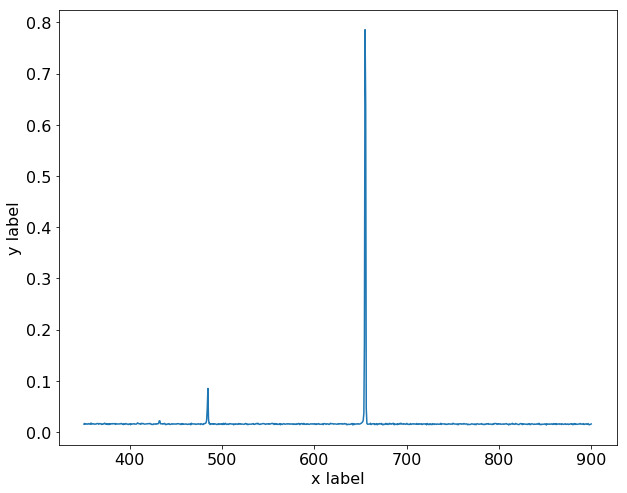

In [72]:
## create a figure with desirable size
text_fig = plt.figure(figsize=(10,8))

## plot the data
plt.plot(x_text_data, y_text_data)
## use this for scattered plot
# plt.scatter(x_text_data, y_text_data)


## label the axes on the plot
plt.xlabel("x label",fontsize=16)
plt.ylabel("y label",fontsize=16)

## adjust the font size for ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

## show the plot
plt.show()

## Functions
You can define your own functions to perform data analysis such as processing your data or fitting your data with the function.

In [73]:
## define a function to simulate data
def flip_ten_pennys_n_times(n):
    '''
    this function flips 10 pennys n times and returns an array (with n entries) of the sums
    ---- input ---
    n: integer
    '''
    total_array = np.empty(n) ##This initializes an empty numpy array with n entries
    for i in range(n):
        total_array[i] = flip_ten_pennys()
    return total_array


## define a binomial function
## but first, you need to define the gamma function from scipy library
gamma = special.gamma
## now you can define the binomial function (or your own function)
def binomial(k,n,p):
    return p**k * (1.0- p)**(n-k) * gamma(n+1) / gamma(k+1) / gamma(n-k+1)

## Curve fitting

You can fit your data with a function. There are several ways to fit your data. I will introduce some methods.

 * fit the data by hand by adjusting the parameters to find the best fit
 * fit the data with defined function
 * find the minimum $\chi^2$ value for the best fit using `curve_fit`
 
Note: if you use the `curve_fit` function, you will start with a "guess" parameter. The program will go through several irritations to find the best fit. If the starting guess parameter is off, it is likely that the calculation will get stuck in the local minimum where it cannot find the best fit. In this case, you need to adjust your starting guess parameters.


### Excercise:

Adjust the mean, and sigma (the parameters in the above fit), to make the red line fit the gaussian data.  compare the values you recover from the mean and standard deviation you calculate for the gaussian_random_array.

mean:  -0.0104118810684
standard deviation 0.997847875189


(array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.]),
 <a list of 7 Text yticklabel objects>)

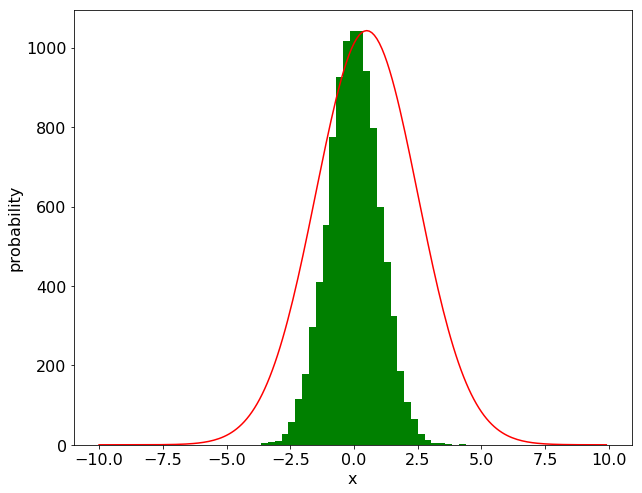

In [74]:
## create a figure with desirable size
fig = plt.figure(figsize=(10,8))

## making my own simulated data 
gaussian_random_array = np.random.randn(10000)

## define the variables needed for the figure
n, bins, patches = plt.hist(gaussian_random_array, 30,  facecolor='green');
#print n     ## n is the counts in each bin
#print bins  ## bins is the position of each bin of the histogram

print "mean: ", np.mean(gaussian_random_array)
print "standard deviation", np.std(gaussian_random_array)

#### Now you are going to fit your data using the theoretical curve (comment everything below this line to see your data without the fit)
## overplot a theoretical curve
## Note: you can adjust the parameters below to fit your data better
## make an array for the values of x for which we will calculate the model
x_gaussian = np.arange(-10,10,.1)  
## make a model
mean = 0.5
sigma = 2.  ## this is the standard deviation
A = np.max(n)
y_gaussian = A * np.exp(-.5*((x_gaussian-mean)/sigma)**2)
plt.plot(x_gaussian,y_gaussian,'r')

plt.xlabel("x",fontsize=16)
plt.ylabel("probability",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35]),
 <a list of 9 Text yticklabel objects>)

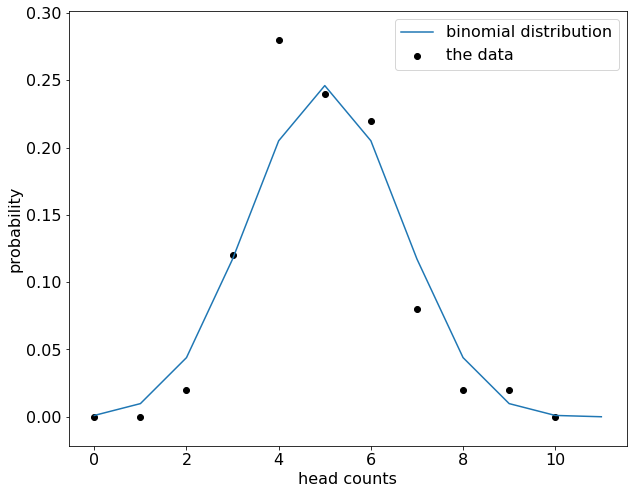

In [58]:
##### Fitting your data with a function
## assume "xs" and "ys" are the data we collected
xs = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
ys = np.array([0.,0.,0.02,0.12,0.28,0.24,0.22,0.08,0.02,0.02,0.])

## fit the scattered data points with binomial distribution
fig = plt.figure(figsize=(10,8))
plt.scatter(range(0,11),ys,label="the data",c="black")
plt.plot(xs,binomial(xs,10,0.5),label="binomial distribution")
plt.legend(fontsize=16)
plt.xlabel("head counts",fontsize=16)
plt.ylabel("probability",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

## save the figure
#plt.savefig(fig_name.pdf,bbox_inches='tight')

[ 2.55423706  1.35190947  0.47450618]
[[ 0.0158905   0.00681778 -0.0007614 ]
 [ 0.00681778  0.02019919  0.00541905]
 [-0.0007614   0.00541905  0.00282595]]


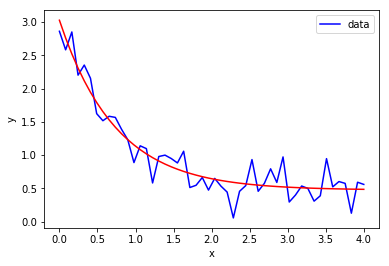

In [111]:
##### Curve_fit
## define the fitting function - fitting function of x with a, b, c parameters
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

## define the data with some noise
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b', label='data')

## fit the data
popt, pcov = curve_fit(func, xdata, ydata)
## this is the best fit value
print popt
## this is the error for parameter a, b, and c in matrix form
print pcov

## plot the data with the fit function
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.plot(xdata, func(xdata, *popt), 'r')